In [1]:
import statsmodels.api as sm
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, geom_point, scale_size, scale_color_manual, labs, theme_minimal, scale_x_continuous, scale_y_continuous

## Working with Data of Global Indicators - Gapminder

"Gapminder identifies systematic misconceptions about important global trends and proportions and uses reliable data to develop easy to understand teaching materials to rid people of their misconceptions."


## Task 1

Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.


<img src = "gapminder_pic.png"
    width = "750"
    height = "250">

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

For the year 2010:

    - Income is being mapped to X.
    - A bubble chart is being used
    - Income is measured in GDP per capita
    - Color is based on region
    - The chart is sectioned in to income level
    - The size of the bubble chart is depicted on the population of each region
    - Life expectancy is being mapped to Y.
    - Population is being mapped to size. 
    - Region is being mapped to fill/color.

2. Import the q1data.csv dataset.

In [2]:
q1data = pd.read_csv('Data/q1data.csv')
q1data.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best you can using plotnine.

Sources: 
https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python.html

https://stackoverflow.com/questions/73632511/how-do-i-set-scaling-for-axes-using-plotnine

/opt/anaconda3/lib/python3.12/site-packages/plotnine/guides/guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


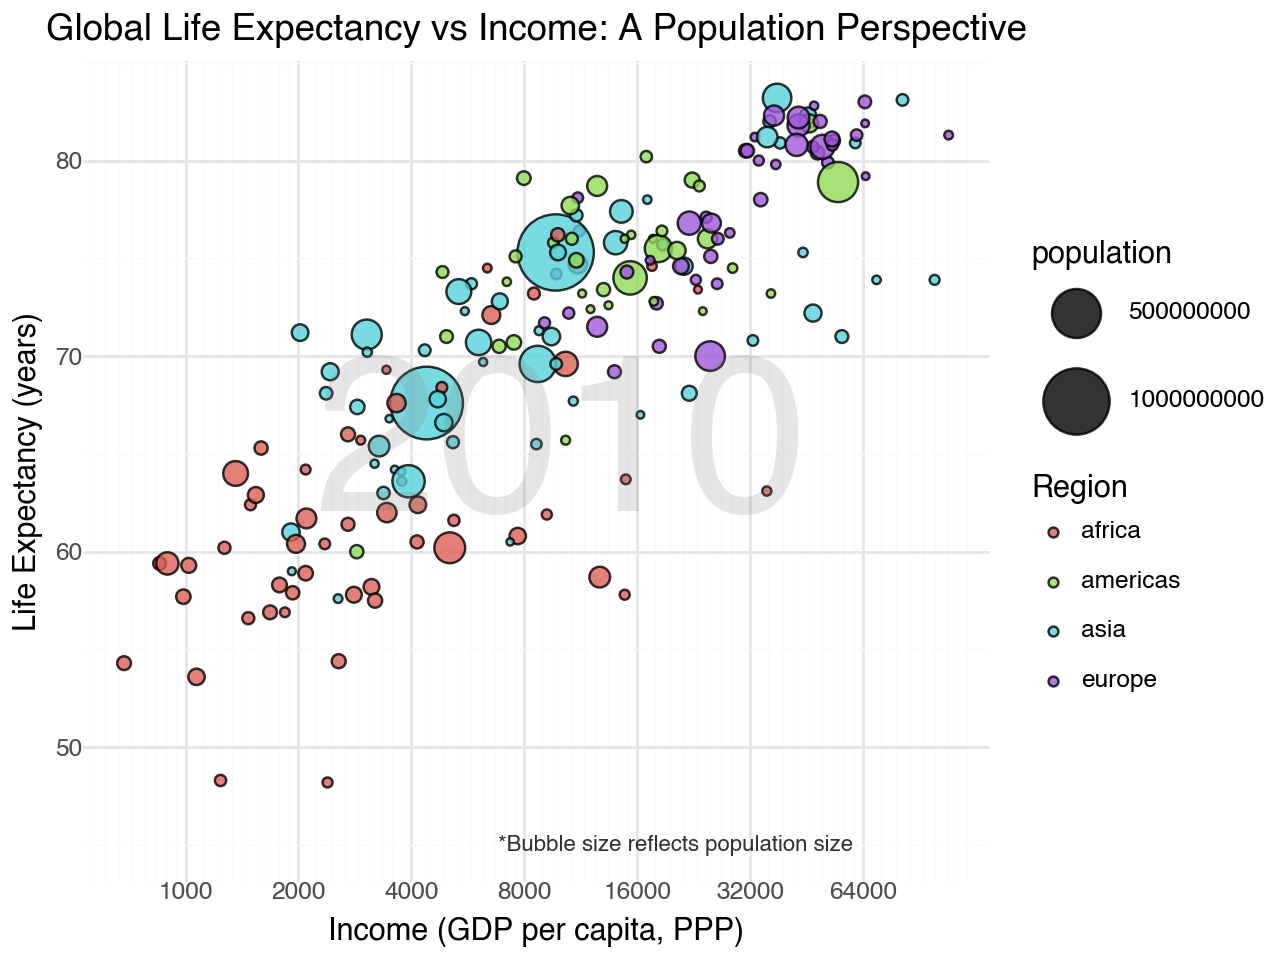

In [3]:
from plotnine import ggplot, aes, geom_jitter, scale_size_continuous,scale_x_log10, scale_size, scale_color_manual, labs, theme_minimal, theme, scale_x_continuous, scale_y_continuous, annotate, guides
import pandas as pd

# Define your new color palette
new_colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']

# Update the plot with the new colors
ggplot(q1data.dropna(), aes(x='income', y='life_exp', size='population', fill='four_regions')) + \
    geom_point(alpha=0.8) + \
    scale_size_continuous(range=[1, 15]) + \
    theme_minimal() + \
    labs(x='Income (GDP per capita, PPP)', y='Life Expectancy (years)', 
         fill='Region',
         title="Global Life Expectancy vs Income: A Population Perspective") + \
    guides(size=None) + \
    scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) + \
    annotate("text", x=10000, y=65, label="2010", 
             size=80, color="grey", alpha=0.2, ha='center') + \
    annotate("text", x=60000, y=45, label="*Bubble size reflects population size", 
             size=8, color="black", alpha=0.8, ha='right') + \
    scale_color_manual(values=new_colors) + \
    theme(legend_position='right')



4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

Besides using `geom_point`, another option would be to use `geom_jitter` and `geom_line` plots together. While a line plot (`geom_line`) alone can show trends or connections across data points, it lacks the ability to indicate population size. This is why it's beneficial to integrate `geom_jitter`—to help spread the data points and show population size through bubble size. Combining these geometries provides both a sense of relationships between variables (through the line plot) and an understanding of data density or importance (through the size of the jittered points).

<positron-console-cell-4>:24: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


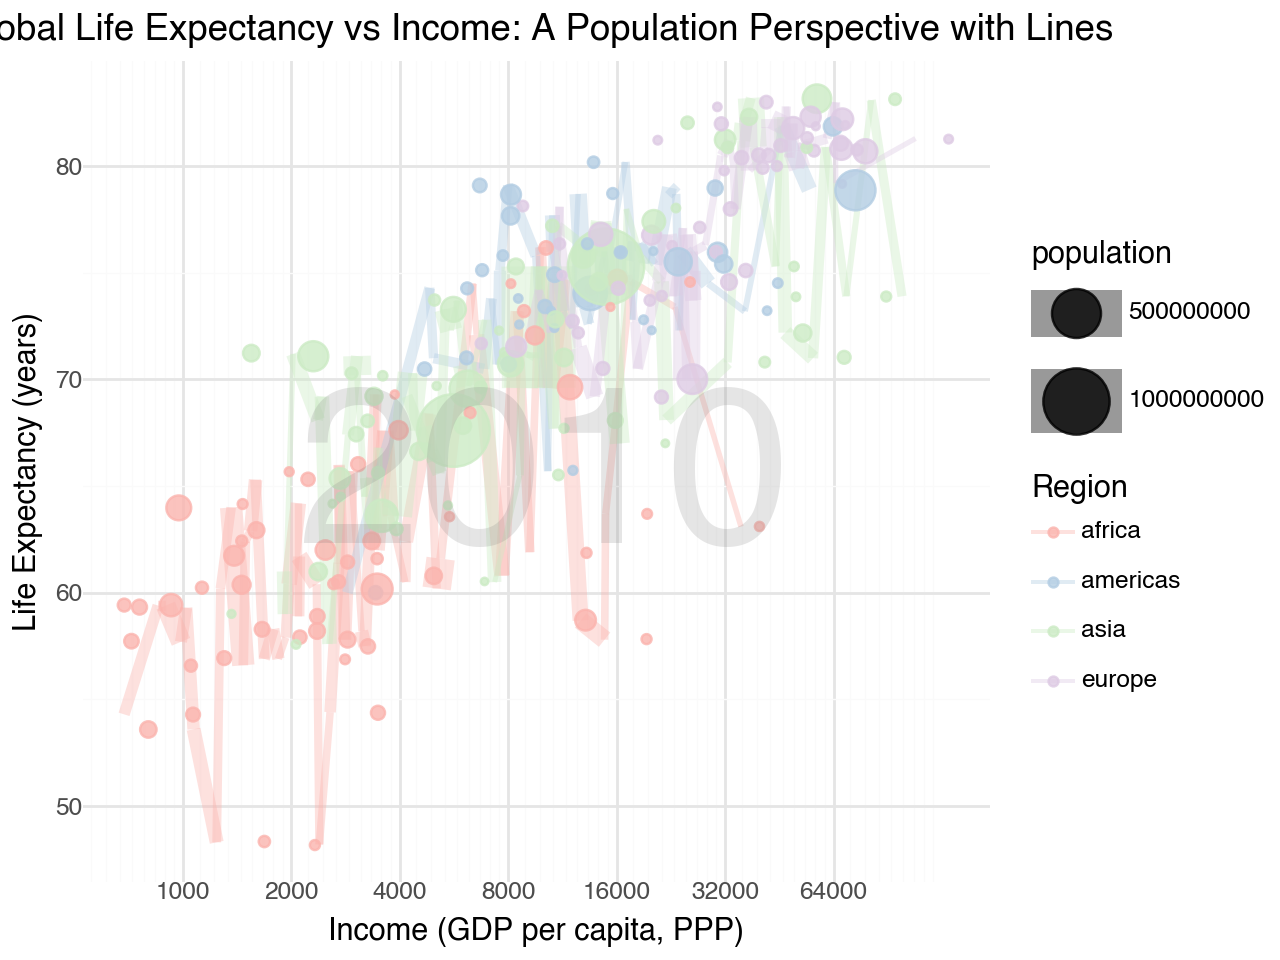

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


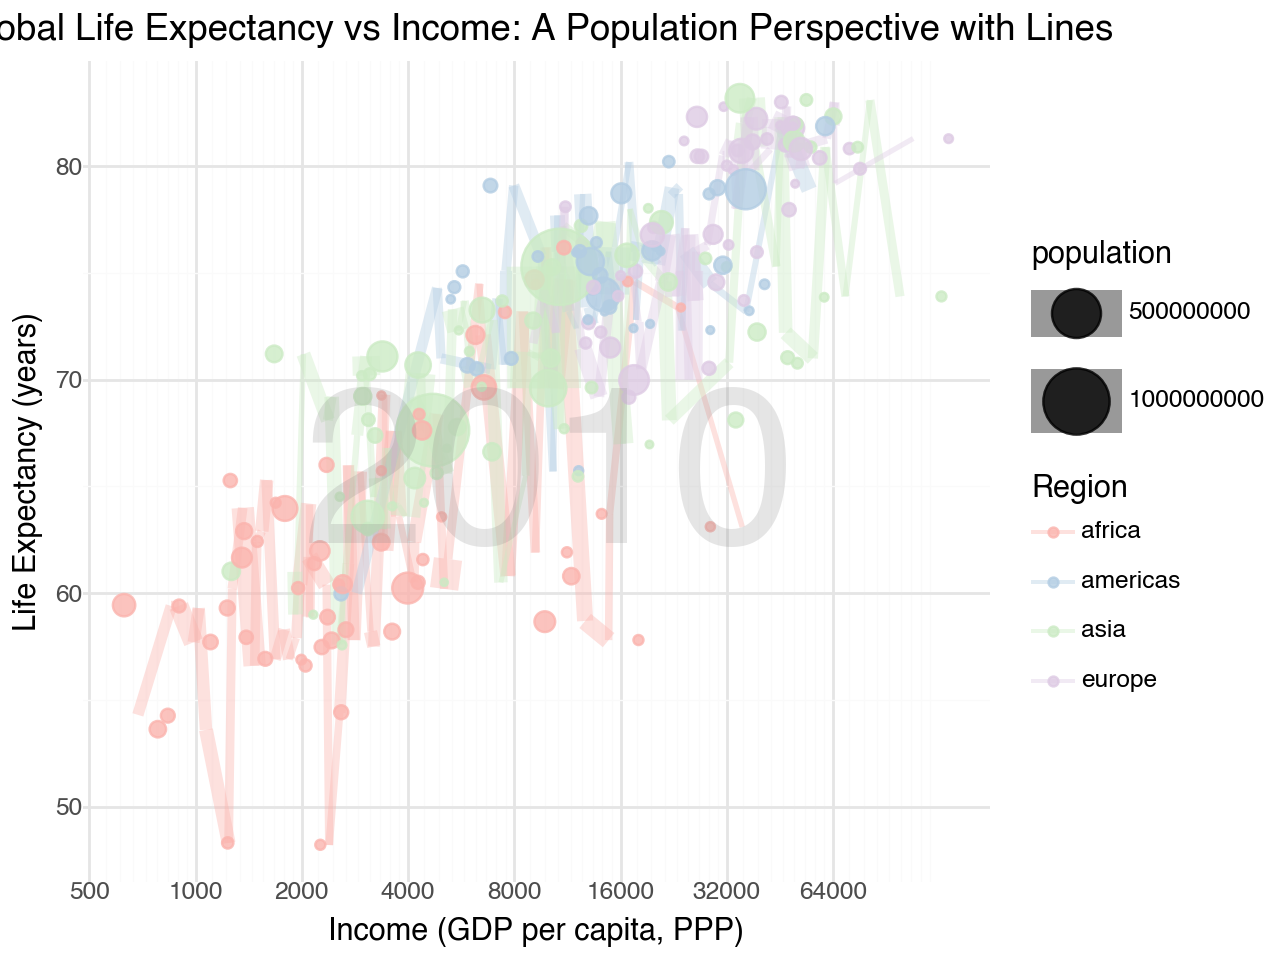

In [4]:
from plotnine import ggplot, aes, geom_jitter, geom_line, scale_size_continuous, scale_x_log10, scale_size, scale_color_manual, labs, theme_minimal, theme, scale_x_continuous, scale_y_continuous, annotate, guides
import pandas as pd

# Define color palette
new_colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']

# Create the plot
plot = (ggplot(q1data.dropna(), aes(x='income', y='life_exp', size='population', color='four_regions'))
        + geom_line(aes(group='four_regions'), alpha=0.4)  # Adding geom_line
        + geom_jitter(alpha=0.8, width=0.2)  # Jitter to spread out bubbles
        + scale_size_continuous(range=[1, 15])  # Size range of bubbles
        + theme_minimal()
        + labs(x='Income (GDP per capita, PPP)', y='Life Expectancy (years)', 
               color='Region',
               title="Global Life Expectancy vs Income: A Population Perspective with Lines")
        + guides(size=None)
        + scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000])  # Logarithmic x-axis
        + annotate("text", x=10000, y=65, label="2010", size=80, color="grey", alpha=0.2, ha='center')  # Large 2010 background
        + scale_color_manual(values=new_colors)  # Custom color palette
        + theme(legend_position='right')
       )

# Display the plot
print(plot)



<positron-console-cell-5>:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


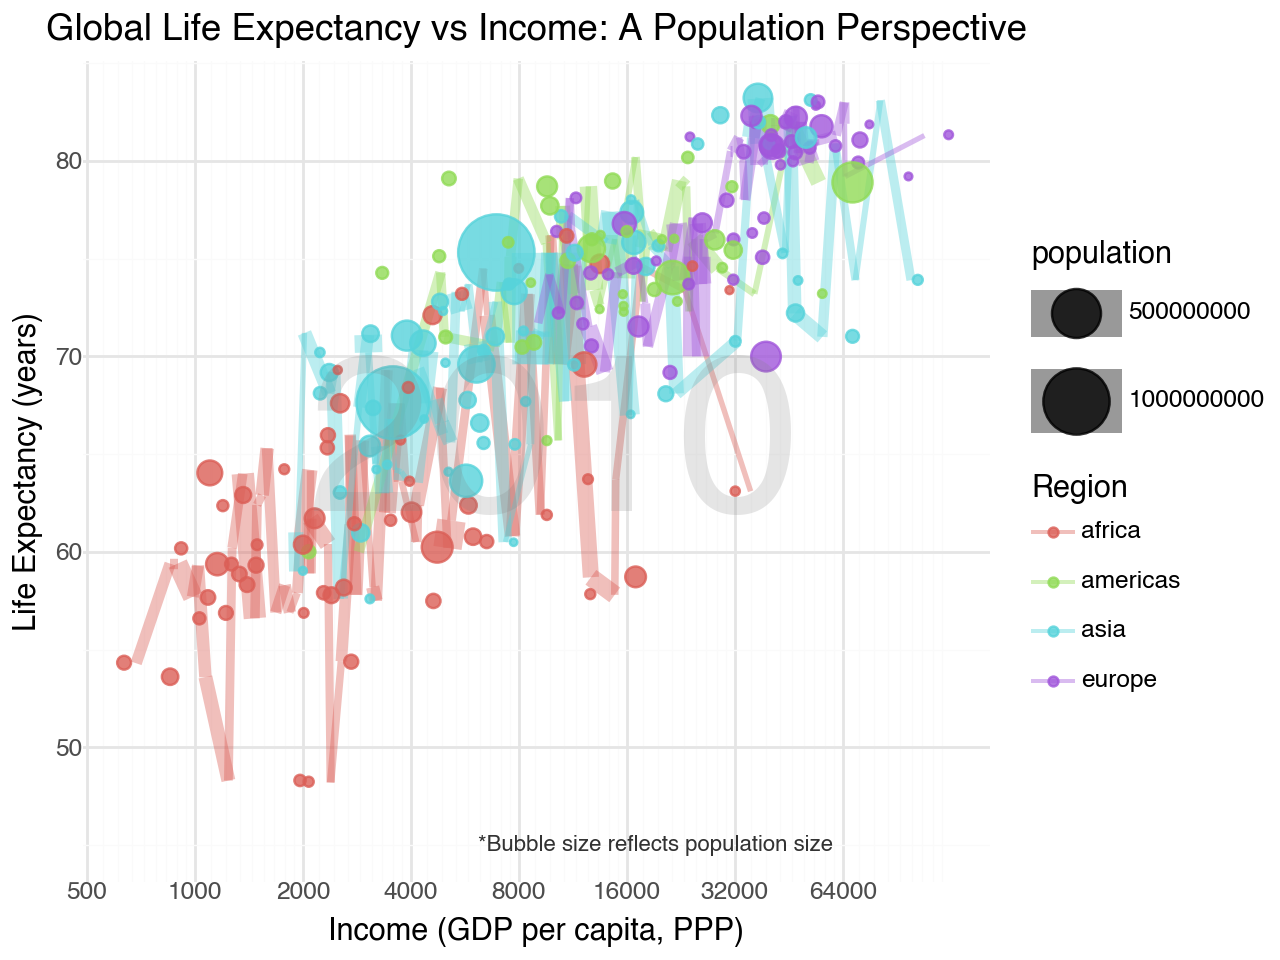

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


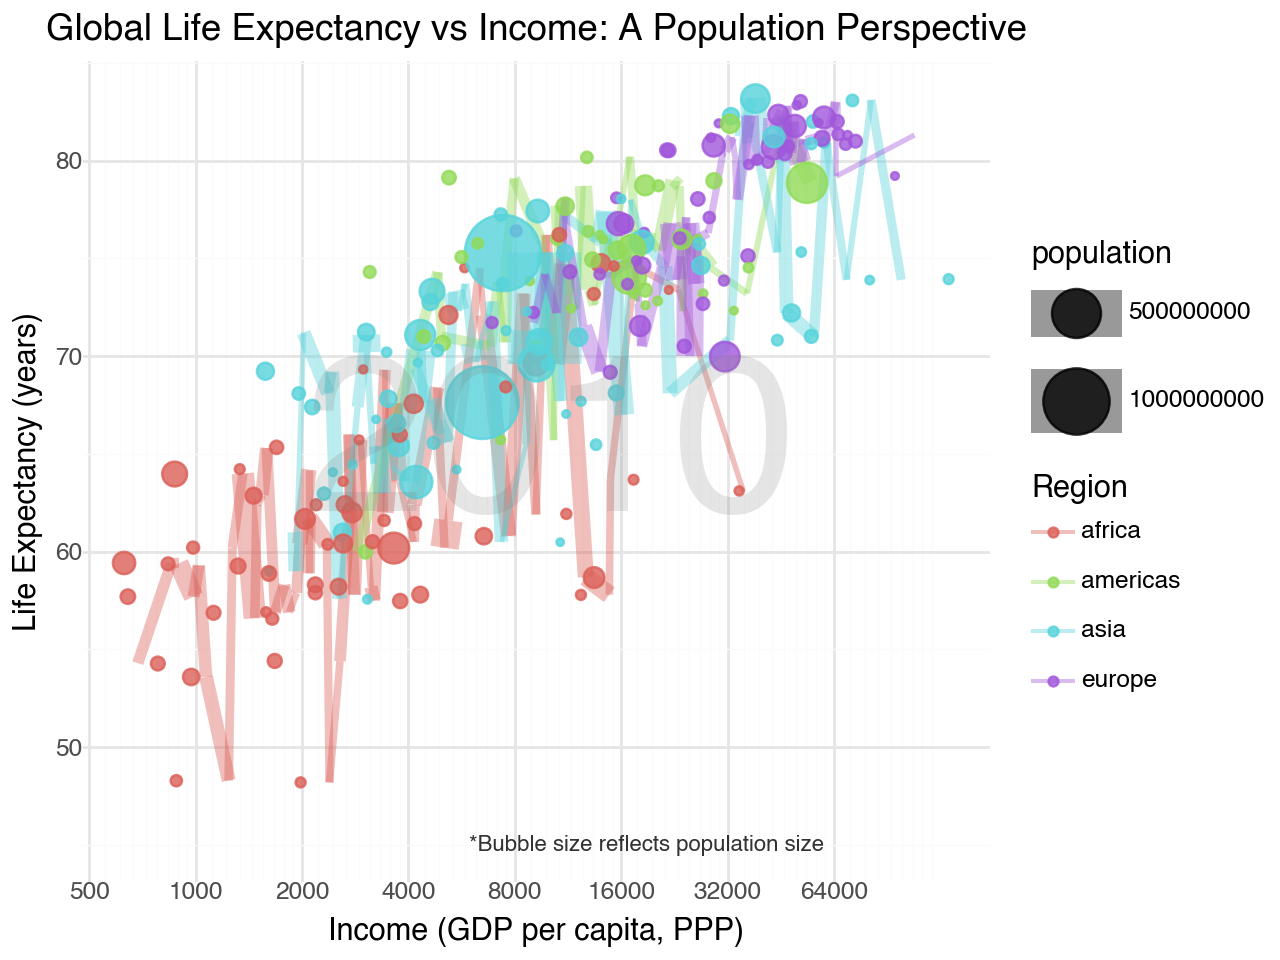

In [5]:
plot = (
    ggplot(q1data.dropna(), aes(x='income', y='life_exp', size='population', color='four_regions'))
    + geom_line(aes(group='four_regions'), alpha=0.4)
    + geom_jitter(alpha=0.8, width=0.2)
    + scale_size_continuous(range=[1, 15])
    + theme_minimal()
    + labs(x='Income (GDP per capita, PPP)', y='Life Expectancy (years)', 
           color='Region',
           title="Global Life Expectancy vs Income: A Population Perspective")
    + guides(size=None)
    + scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000])
    + annotate("text", x=10000, y=65, label="2010", 
               size=80, color="grey", alpha=0.2, ha='center')
    + annotate("text", x=60000, y=45, label="*Bubble size reflects population size", 
               size=8, color="black", alpha=0.8, ha='right')
    + theme(legend_position='right')
)

print(plot)


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


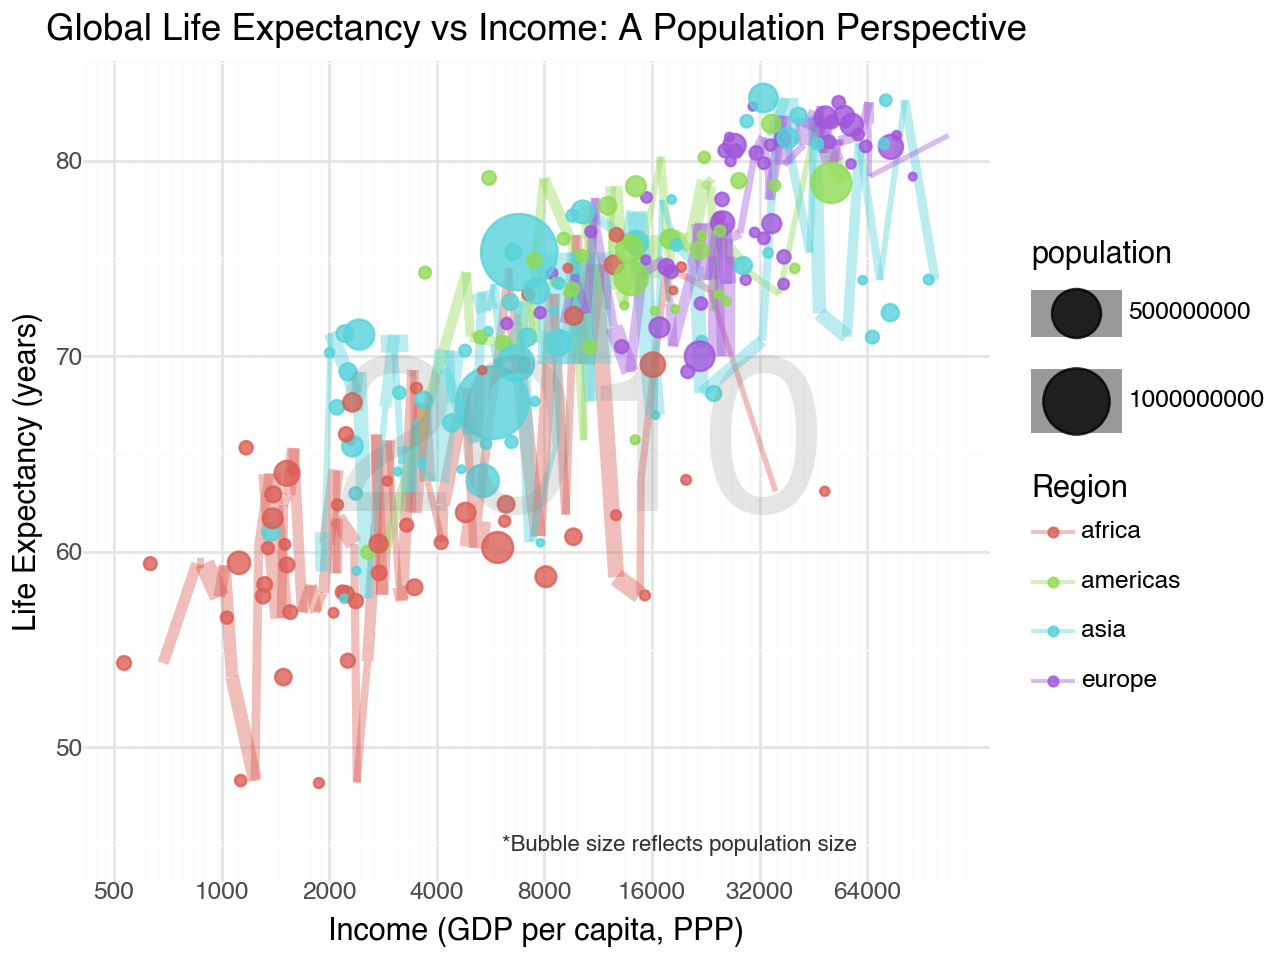